In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,auc,roc_curve,PrecisionRecallDisplay
from yellowbrick.classifier import DiscriminationThreshold,ClassificationReport

In [2]:
df = pd.read_csv('sonar.csv',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
# seprate X and y 
X = df.drop(60,axis=1)
y = df[60]

In [5]:
# remove constant because the 
df_cols = X.columns
constant_featurs = []
for col in df_cols:
    if df[col].std()==0:
        constant_featurs.append(col)

In [6]:
# columns have same values 
constant_featurs # empty list syas there is no constant features 

[]

In [7]:
# remove features which has most of values are same called Quasy-constant
sel = VarianceThreshold(threshold=0.01) # means varience is very less that features values are almost same 
sel.set_output(transform='pandas') # need dataframe in result by default result is array 
sel.fit(X)

VarianceThreshold(threshold=0.01)

In [8]:
sel.get_feature_names_out()

array(['x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35',
       'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44',
       'x45'], dtype=object)

In [9]:
columns_name = sel.get_feature_names_out() # because result is array so requiered columns name when converts it to df

In [10]:
columns_name

array(['x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35',
       'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44',
       'x45'], dtype=object)

In [11]:
new_X = sel.transform(X)

In [12]:
# assign columns to new dataframe 
new_X.columns = columns_name

In [13]:
# to see which columns excluded
df_samp = pd.Series(~sel.get_support(indices=False)).to_frame()
excluded_cols = df_samp[df_samp[0]==True].index


In [14]:
excluded_cols

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
            57, 58, 59],
           dtype='int64')

In [15]:
new_X

,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,...,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45
0,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,...,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386
1,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,...,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203
2,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,...,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176
3,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,...,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654
4,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,...,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,...,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085
204,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,...,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080
205,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,...,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757
206,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,...,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985


In [16]:
# remove Quasy-constant using pandas because all features with less varieance has most of values are same 
df_cols = X.columns
constant_featurs = []
for col in df_cols:
    if df[col].var()<=0.01:
        constant_featurs.append(col)

In [17]:
cols = new_X.columns
duplicate_cols = set()

In [18]:
new_X

,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,...,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45
0,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,...,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386
1,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,...,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203
2,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,...,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176
3,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,...,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654
4,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,...,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,...,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085
204,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,...,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080
205,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,...,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757
206,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,...,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985


In [19]:
# to check whether there is duplicate cols or not 
duplicate_cols=set()
for i in range(0,len(cols)):
    for j in range(i+1,len(cols)):
        if new_X.iloc[:,i].equals(new_X.iloc[:,j]):
            duplicate_cols.append(j)
            

In [20]:

duplicate_cols  # there is no duplicate columns in new_X

set()

In [21]:
# to check correlation between two independent variables 
corrmat = new_X.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat>0.5]
corrmat = corrmat[corrmat<1]
corr_df = pd.DataFrame(corrmat)
corr_df.reset_index(inplace=True)
corr_df.columns = ['fea1','fea2','correlation']

In [22]:
corr_df # this is a df of how fea1 is corr with fea2 and correlation value.
# here because highly correlated features affects model performance.

,fea1,fea2,correlation
0,x17,x16,0.925836
1,x16,x17,0.925836
2,x15,x14,0.912625
3,x14,x15,0.912625
4,x20,x19,0.905062
...,...,...,...
175,x35,x38,0.508390
176,x37,x33,0.503776
177,x33,x37,0.503776
178,x17,x21,0.502493


Text(0, 0.5, 'x14')

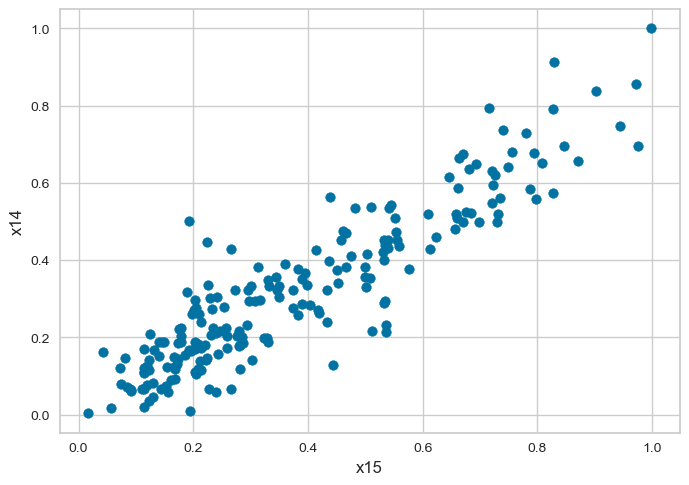

In [23]:
# plot graph to see relation 
plt.scatter(new_X['x15'],new_X['x14']) # possitive relation 
plt.xlabel('x15')
plt.ylabel('x14')

In [24]:
# two features are highly correlated and that affects model performance so we remove correlated features and keep only one 
# make group set and know importance of feature 
fea1_lst = list(corr_df['fea1'].unique())

In [25]:
group_df = []
for col in fea1_lst:
    df = corr_df[corr_df['fea1']==col]
    group_df.append(df)
    

In [26]:
# here x17 and correlated with feature is given.
group_df[0] 

,fea1,fea2,correlation
0,x17,x16,0.925836
12,x17,x18,0.875028
70,x17,x15,0.774855
100,x17,x19,0.642354
106,x17,x14,0.632139
137,x17,x13,0.560637
144,x17,x20,0.540894
178,x17,x21,0.502493


In [27]:
# how to decide which one we keep, that is possible with help of feature importance 
#to know feature importance 

# first create list of subset of feature 
subset_lst = []
for df in group_df:
    subset_lst.append(list(df['fea2'].unique())+list(df['fea1'].unique()))

In [28]:
subset_lst

[['x16', 'x18', 'x15', 'x19', 'x14', 'x13', 'x20', 'x21', 'x17'],
 ['x17', 'x15', 'x14', 'x18', 'x13', 'x19', 'x16'],
 ['x14', 'x16', 'x17', 'x13', 'x18', 'x19', 'x15'],
 ['x15', 'x13', 'x16', 'x17', 'x18', 'x12', 'x14'],
 ['x19', 'x21', 'x18', 'x17', 'x30', 'x20'],
 ['x20', 'x18', 'x21', 'x17', 'x30', 'x16', 'x15', 'x19'],
 ['x36', 'x34', 'x37', 'x33', 'x39', 'x38', 'x35'],
 ['x35', 'x37', 'x34', 'x38', 'x39', 'x33', 'x36'],
 ['x8', 'x10', 'x9'],
 ['x9', 'x10', 'x8'],
 ['x17', 'x19', 'x16', 'x20', 'x15', 'x21', 'x14', 'x13', 'x18'],
 ['x35', 'x33', 'x36', 'x37', 'x32', 'x34'],
 ['x14', 'x12', 'x15', 'x16', 'x17', 'x18', 'x13'],
 ['x45', 'x43', 'x42', 'x41', 'x44'],
 ['x44', 'x43', 'x42', 'x41', 'x40', 'x45'],
 ['x26', 'x24', 'x23', 'x27', 'x25'],
 ['x25', 'x27', 'x24', 'x26'],
 ['x34', 'x32', 'x35', 'x31', 'x36', 'x37', 'x33'],
 ['x23', 'x25', 'x26', 'x22', 'x24'],
 ['x24', 'x22', 'x25', 'x21', 'x23'],
 ['x9', 'x11', 'x8', 'x12', 'x10'],
 ['x23', 'x21', 'x24', 'x22'],
 ['x44', 'x42', 

In [29]:
# assign value 'R' = 0 and 'M' = 1
y = y.map({'R':0,'M':1})

In [30]:
imp_feature_lst = set()
feature_with_score =[]
for cols in subset_lst:
    rf = RandomForestClassifier(n_estimators=20,max_depth=3)
    rf.fit(new_X[cols],y)
    imp_fea_lst = list(rf.feature_importances_)
    max_imp = max(imp_fea_lst)
    index = imp_fea_lst.index(max_imp)
    col = cols[index]
    feature_with_score.append({str(col):max_imp})
    imp_feature_lst.add(col)

In [31]:
feature_with_score

[{'x20': 0.2272047566841438},
 {'x19': 0.21567696770926847},
 {'x19': 0.2981563760929035},
 {'x12': 0.36338850318925436},
 {'x19': 0.22710203479326102},
 {'x19': 0.19469722206901674},
 {'x34': 0.22345640419364662},
 {'x35': 0.24403869802749467},
 {'x10': 0.4515971602112659},
 {'x9': 0.35715649669866045},
 {'x20': 0.23505316548260133},
 {'x34': 0.22003318592369242},
 {'x12': 0.36135967414451753},
 {'x45': 0.30153460499343837},
 {'x44': 0.24615030313992692},
 {'x27': 0.3435601667190459},
 {'x27': 0.3387603507486807},
 {'x35': 0.22917379648499245},
 {'x26': 0.3097510031265209},
 {'x24': 0.2498466485999309},
 {'x11': 0.26210206114076806},
 {'x21': 0.34883236662442235},
 {'x44': 0.3241610873737072},
 {'x35': 0.2404879246752211},
 {'x20': 0.21557081368387837},
 {'x10': 0.3850804979691361},
 {'x12': 0.34687066387416404},
 {'x31': 0.24477086193944952},
 {'x19': 0.19004106753416114},
 {'x30': 0.28126120069747745},
 {'x35': 0.32186241567110907},
 {'x39': 0.24507923930227665},
 {'x44': 0.35283989

In [32]:
final_feature_df = new_X[imp_feature_lst]

C:\Users\MayurNandanwar\AppData\Local\Temp\ipykernel_5272\496506350.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  final_feature_df = new_X[imp_feature_lst]


In [33]:
final_feature_df

,x20,x21,x12,x34,x27,x31,x39,x11,x24,x38,x10,x30,x9,x19,x44,x26,x35,x45
0,0.5783,0.5071,0.2238,0.8537,0.8080,0.2604,0.2744,0.1582,0.6711,0.4943,0.1609,0.1307,0.2111,0.4797,0.2641,0.7104,0.8507,0.1386
1,0.5212,0.4052,0.6919,0.1306,0.2767,0.2947,0.1970,0.6552,0.3250,0.1840,0.4918,0.3788,0.2872,0.7818,0.0621,0.3271,0.4182,0.0203
2,0.7974,0.6737,0.5544,0.4232,0.8533,0.5045,0.4719,0.7060,0.5331,0.5375,0.6333,0.8512,0.6194,0.8619,0.2111,0.5070,0.3043,0.0176
3,0.2741,0.3690,0.0184,0.3953,0.2520,0.7340,0.9167,0.1992,0.3140,0.9857,0.0881,0.6260,0.1264,0.3973,0.4295,0.5256,0.3012,0.3654
4,0.4148,0.4292,0.4256,0.1951,1.0000,0.5459,0.2430,0.3952,0.3161,0.2828,0.4152,0.5103,0.4459,0.4636,0.0692,0.6995,0.4181,0.0528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.4130,0.6879,0.2275,0.0849,1.0000,0.5547,0.1200,0.2933,0.8919,0.1676,0.3108,0.6041,0.2684,0.1740,0.0902,0.9987,0.0608,0.1085
204,0.3272,0.5949,0.2990,0.0928,1.0000,0.7117,0.0345,0.3425,0.9888,0.1768,0.3085,0.7691,0.2154,0.2395,0.0954,0.9448,0.1297,0.0080
205,0.3164,0.5888,0.1878,0.1098,1.0000,0.7305,0.0325,0.2374,0.9424,0.1929,0.2716,0.7717,0.2529,0.1395,0.0910,0.9699,0.1446,0.0757
206,0.5685,0.6990,0.1578,0.0776,0.8297,0.4961,0.0849,0.2812,0.9242,0.1349,0.2898,0.6893,0.2354,0.4293,0.1319,0.9979,0.0364,0.0985


Text(0.5, 1.0, 'correlation plot')

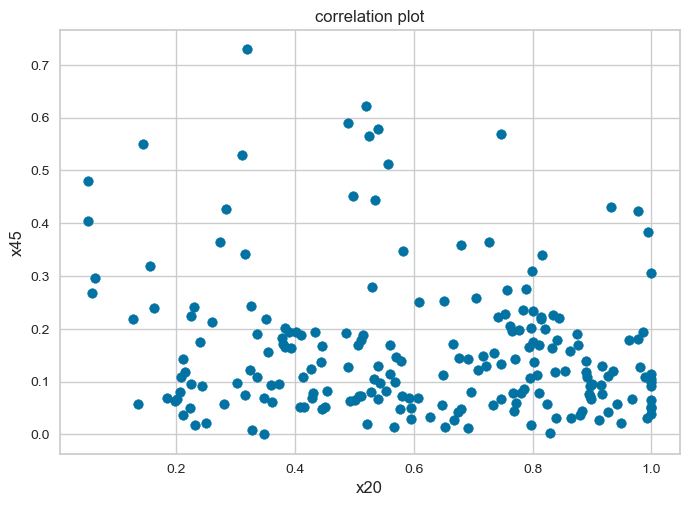

In [34]:
# see coorelation with other feature 
plt.scatter(final_feature_df['x20'],final_feature_df['x45'])
plt.xlabel('x20')
plt.ylabel('x45')
plt.title('correlation plot')
# we can see there is no relation ship between independent features x20 and x45 and also column decrease so model performance 
# will increase because model can easily interprete and find out patterns.

In [35]:
X = final_feature_df 

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [37]:
# split dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [38]:
# lets train dataset On RandomForestClassifier
rf = RandomForestClassifier(max_depth=3)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [39]:
pred_y = rf.predict(x_test)

In [40]:
rf_test_accuracy = accuracy_score(y_test,pred_y)

In [41]:
rf_train_accuracy = accuracy_score(y_train,rf.predict(x_train))

In [42]:
rf_train_accuracy,rf_test_accuracy # here we can see that for train dataset accuracy and testdataset accuracy 

(0.8877005347593583, 0.8095238095238095)

In [43]:
# use Logistic Regression Algorithm
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [44]:
logit_train_accuracy = accuracy_score(y_train,logit.predict(x_train))

In [45]:
logit_test_accuracy = accuracy_score(y_test,logit.predict(x_test))

In [46]:
logit_train_accuracy,logit_test_accuracy

(0.8128342245989305, 0.8571428571428571)

In [47]:

# calculate the fpr and tpr for all thresholds of the classification
probs = logit.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [48]:
threshold

array([1.77771612, 0.77771612, 0.75677491, 0.74476602, 0.72887182,
       0.6246742 , 0.61694602, 0.51701773, 0.10209478])

In [49]:
# same for logistic Regression 
roc_auc_threshod_df = pd.concat([pd.Series(fpr),pd.Series(tpr),pd.Series(threshold)],axis=1)
roc_auc_threshod_df.columns = ['fpr','tpr','threshold']
# from left to right threshold increases 0 to 1
# we can see in below ROC AUC plot ex. threshold 1.78 true postive rate = 0 and false postive rate = 0
# for threshold 0.089 tpr = 1 and fpr =1

In [50]:
roc_auc_threshod_df

,fpr,tpr,threshold
0,0.000000,0.000,1.777716
1,0.000000,0.125,0.777716
2,0.076923,0.125,0.756775
3,0.076923,0.250,0.744766
4,0.153846,0.250,0.728872
5,0.153846,0.500,0.624674
6,0.230769,0.500,0.616946
7,0.230769,1.000,0.517018
8,1.000000,1.000,0.102095


In [51]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr_1, tpr_1,threshold_1 = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

In [52]:
# This is for random forest at which threshold what is tpr and fpr 
roc_auc_threshod = pd.concat([pd.Series(fpr_1),pd.Series(tpr_1),pd.Series(threshold_1)],axis=1)
roc_auc_threshod.columns = ['fpr','tpr','threshold']

In [53]:
roc_auc_threshod  # for threshold = 0.601599 fpr = 0.230769, tpr = 1.000 which is best for this dataset
# from left to right threshold increases 0 to 1
# we can see in below ROC AUC plot ex. threshold 1.828 true postive rate = 0 and false postive rate = 0
# for threshold 0.095463 tpr = 1 and fpr =1

,fpr,tpr,threshold
0,0.000000,0.000,1.872394
1,0.000000,0.125,0.872394
2,0.000000,0.750,0.773069
3,0.230769,0.750,0.750224
4,0.230769,0.875,0.706786
5,0.307692,0.875,0.686384
6,0.307692,1.000,0.536147
7,1.000000,1.000,0.060003


In [54]:
roc_auc_threshod_df # here we can say logistic regression best model is where threshold = 0.470411 where tpr = 1 and fpr=0.23

,fpr,tpr,threshold
0,0.000000,0.000,1.777716
1,0.000000,0.125,0.777716
2,0.076923,0.125,0.756775
3,0.076923,0.250,0.744766
4,0.153846,0.250,0.728872
5,0.153846,0.500,0.624674
6,0.230769,0.500,0.616946
7,0.230769,1.000,0.517018
8,1.000000,1.000,0.102095


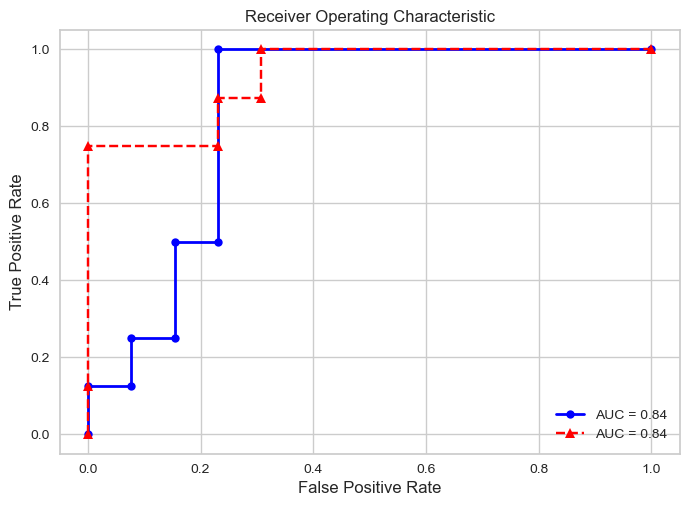

In [55]:
# AUC ROC Curve
plt.plot(fpr, tpr,color='blue', marker='o', linestyle='-',linewidth=2, markersize=6,label = 'AUC = %0.2f'% roc_auc)
plt.plot(fpr_1,tpr_1,color='red',marker='^',linestyle='--',label = 'AUC = %0.2f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
# from this plot we can know model performance at pertictlar threshold, how model saperate to classes but ths plot doesnt
# give view of how many correct prediction made for class 1 and class 0 for that we have Precision and recall curve
# from this we can only determine that best model is that which has less fpr and hogh tpr

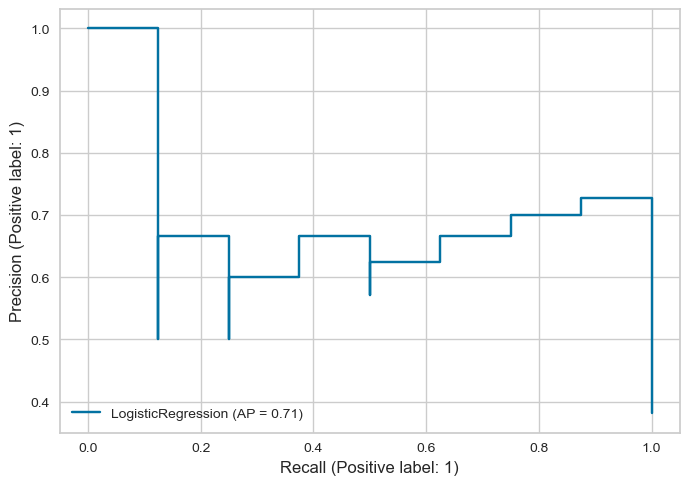

In [56]:
# precision and recall is helpful when we have imbalance class where we have to see that model prediction for minority class
# here we can plot bgraph for class 1 and class 0 and based on use calse we can select class
# my usecase is mine or rock detection then if model wronly detect then submerine will distroy 
# here both precision and recall is important and for that calculate f1 score which is try to optimize precision value over 
# recall 
display = PrecisionRecallDisplay.from_estimator(logit,x_test,y_test,pos_label=1)


C:\Users\MayurNandanwar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


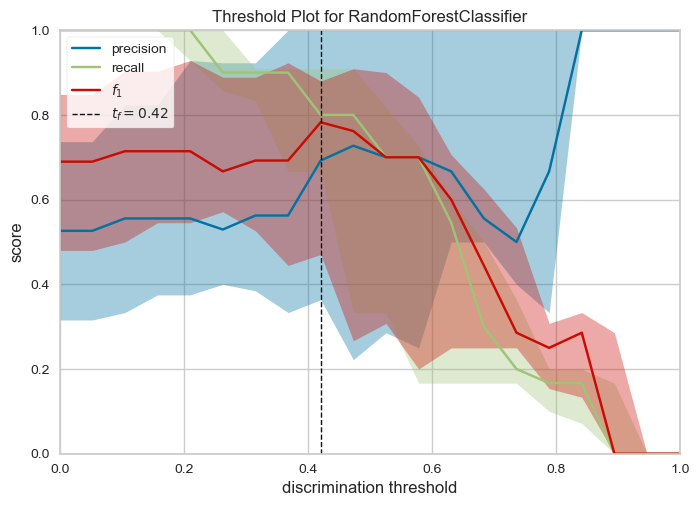

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [57]:
# visualize precision, recall and f1_score we select threshold where f1 score is high
visualizer = DiscriminationThreshold(rf,exclude='queue_rate',n_trials=5,random_state=0)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()

In [58]:
logit_f1_score = f1_score(y_test,logit.predict(x_test))

In [59]:
rf_f1_score = f1_score(y_test,rf.predict(x_test))

In [60]:
logit_f1_score,rf_f1_score

(0.8421052631578948, 0.8)

In [64]:
logit_test_accuracy,rf_test_accuracy 

(0.8571428571428571, 0.8095238095238095)

C:\Users\MayurNandanwar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


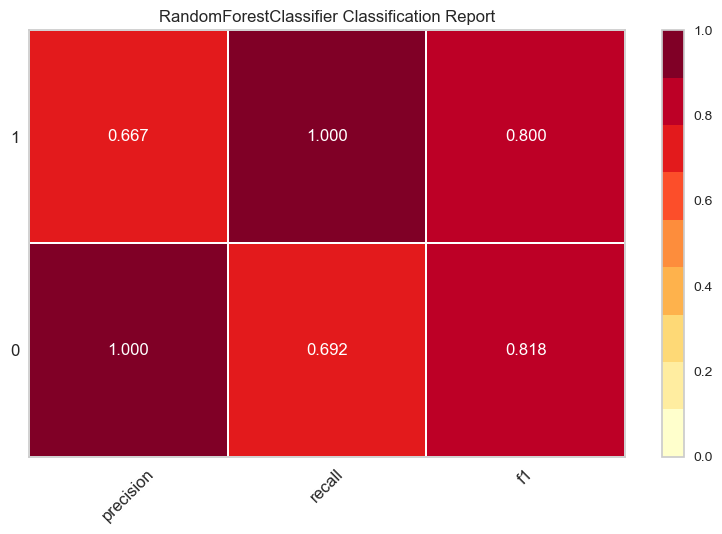

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [62]:
# visualize classification report
visualizer = ClassificationReport(rf)
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

C:\Users\MayurNandanwar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


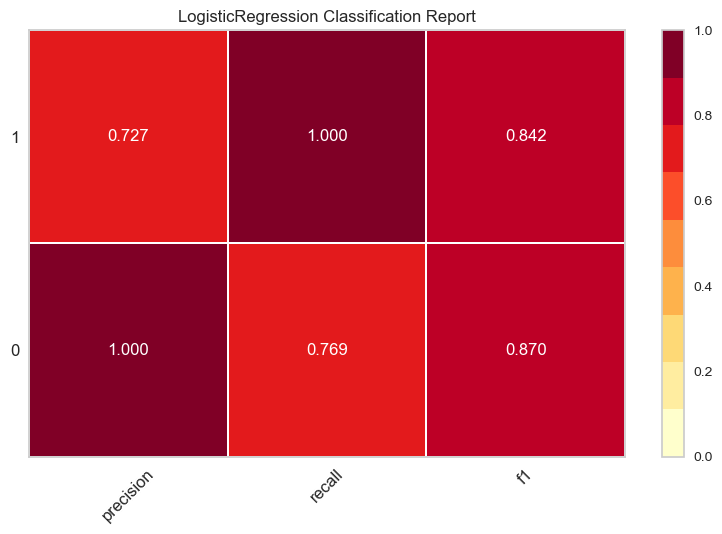

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [63]:
visualizer = ClassificationReport(logit)
visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

Logistic Regressor is best model for detecting The Mines or Rock 